In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

simplefilter('ignore')

In [2]:
folder_bootstrap = Path("results_bootstrap/")
folder_plot = Path("plots/")

In [3]:
models = ["atm_tcr", "rf", "tulip", "xgb"]
model_labels = {'atm_tcr': 'ATM-TCR', 'rf': 'Random Forest', 'xgb': 'Gradient Boosting', 'tulip': 'TULIP'}
palette= {'ATM-TCR': '#004758',
          'Random Forest': '#BECD32',
          'Gradient Boosting': '#343536',
          'TULIP': "#1dadc0"}
capsize=5
fontsize=12

## Aggregate results

In [ ]:
df = pd.DataFrame()
for model in models:
    df_model = pd.read_csv(folder_bootstrap / f"results_bootstrap_{model}.csv")
    df_model['model'] = model_labels[model]
    df = pd.concat([df, df_model], ignore_index=True)
    
# Relative difference between overall ROC-AUC and CI bounds.
df['roc_ci_low_rel'] = df['rocauc'] - df['rocauc_ci_low']
df['roc_ci_high_rel'] = df['rocauc_ci_high'] - df['rocauc']
df.head()

,dist,tcr_bin,rocauc,obs_cnt,pep_cnt,rocauc_ci_low,rocauc_ci_high,model,roc_ci_low_rel,roc_ci_high_rel
0,1,0,0.560815,504.0,90.0,0.517612,0.600675,ATM-TCR,0.043203,0.039860
1,2,0,0.477931,188.0,32.0,0.404641,0.548067,ATM-TCR,0.073290,0.070135
2,3,0,0.481322,110.0,33.0,0.386677,0.572806,ATM-TCR,0.094645,0.091484
3,4,0,0.503500,888.0,131.0,0.469953,0.535544,ATM-TCR,0.033547,0.032044
4,5,0,0.497298,2706.0,436.0,0.479106,0.514683,ATM-TCR,0.018192,0.017385


## Plot ROC-AUC as a function of edit distance

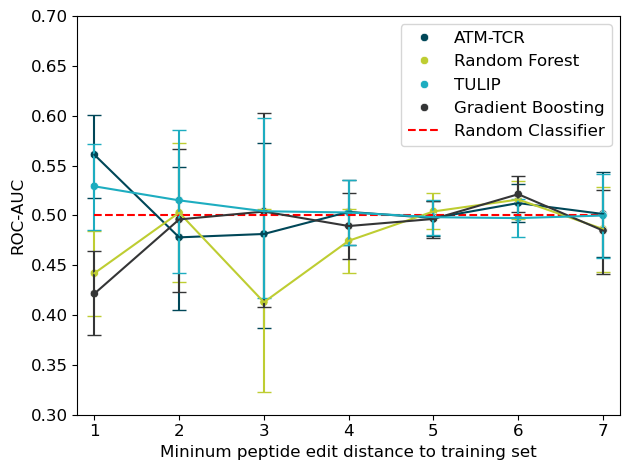

In [5]:
df = df[df['dist']<=7]
sns.scatterplot(data=df, x='dist', y='rocauc', hue='model',
            palette=palette)
for model in model_labels.values():
    df_model = df[df.model==model]
    plt.errorbar(df_model['dist'],
                df_model['rocauc'],
                yerr=[df_model['roc_ci_low_rel'],
                    df_model['roc_ci_high_rel']],
                capsize=capsize, color=palette[model])

plt.hlines(0.5, 1.0, 7.0, color='red', linestyle='--', label='Random Classifier')
plt.legend(fontsize=fontsize)
plt.ylim(0.3,0.7)
plt.xlim(0.8, 7.2)
plt.xlabel('Mininum peptide edit distance to training set', fontsize=fontsize)
plt.ylabel('ROC-AUC', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.tight_layout()
plt.savefig(folder_plot / "fig2c.pdf", dpi=300)
plt.show()